<a href="https://colab.research.google.com/github/godlikeanyone/My-Actions/blob/master/h2o_automl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# H2O AutoML

## Set Up H2O AutoML Environment

In [ ]:
!gdown --fuzzy https://drive.google.com/file/d/1yRpju4-Vp5peh2k86taHO1BfB2LhHWeL/view?usp=sharing -O /content/ALL_in_one.csv

Downloading...
From (original): https://drive.google.com/uc?id=1yRpju4-Vp5peh2k86taHO1BfB2LhHWeL
From (redirected): https://drive.google.com/uc?id=1yRpju4-Vp5peh2k86taHO1BfB2LhHWeL&confirm=t&uuid=c67c4f17-8c55-4fd5-a918-9f1587ce151f
To: /content/ALL_in_one.csv
100% 244M/244M [00:02<00:00, 95.6MB/s]


In [ ]:
import pandas as pd

df = pd.read_csv('/content/ALL_in_one.csv')
print(len(df))

1040928


In [ ]:
!apt-get install openjdk-8-jdk

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java
  libatk-wrapper-java-jni libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common librsvg2-common libxt-dev libxtst6 libxxf86dga1
  openjdk-8-jdk-headless openjdk-8-jre openjdk-8-jre-headless x11-utils
Suggested packages:
  gvfs libxt-doc openjdk-8-demo openjdk-8-source visualvm libnss-mdns
  fonts-nanum fonts-ipafont-gothic fonts-ipafont-mincho fonts-wqy-microhei
  fonts-wqy-zenhei fonts-indic mesa-utils
The following NEW packages will be installed:
  fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java
  libatk-wrapper-java-jni libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common librsvg2-common libxt-dev libxtst6 libxxf86dga1
  openjdk-8-jdk openjdk-8-jdk-headless openjdk-8-jre openjdk-8-jre-headless
  x11-utils
0 upgraded, 18 newly installed,

Install JDK

Exclamation Mark is necessary for indicating that it is a bash command

In [ ]:
!update-alternatives --config java

There are 2 choices for the alternative java (providing /usr/bin/java).

  Selection    Path                                            Priority   Status
------------------------------------------------------------
* 0            /usr/lib/jvm/java-11-openjdk-amd64/bin/java      1111      auto mode
  1            /usr/lib/jvm/java-11-openjdk-amd64/bin/java      1111      manual mode
  2            /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/java   1081      manual mode

Press <enter> to keep the current choice[*], or type selection number: 2
update-alternatives: using /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/java to provide /usr/bin/java (java) in manual mode


In [ ]:
!java -version

openjdk version "1.8.0_452"
OpenJDK Runtime Environment (build 1.8.0_452-8u452-ga~us1-0ubuntu1~22.04-b09)
OpenJDK 64-Bit Server VM (build 25.452-b09, mixed mode)


This command displays Java version.

Make sure it displays openjdk version 1.8.*

If it displays otherwise, (such as openjdk version 10.*) H2O might display an error like this:

<i>H2OServerError: Server process terminated with error code 1</i>

To fix the issue, try this command to change Java version.

```!update-alternatives --config java```


In [ ]:
!pip install H2O

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.9/265.9 MB 4.7 MB/s eta 0:00:00


Install H2O with pip

In [ ]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "1.8.0_452"; OpenJDK Runtime Environment (build 1.8.0_452-8u452-ga~us1-0ubuntu1~22.04-b09); OpenJDK 64-Bit Server VM (build 25.452-b09, mixed mode)
  Starting server from /usr/local/lib/python3.11/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpv2_xth89
  JVM stdout: /tmp/tmpv2_xth89/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpv2_xth89/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


H2O_cluster_uptime:,07 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,3 months and 26 days
H2O_cluster_name:,H2O_from_python_unknownUser_bel4hg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2.808 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


## Data Preparation

In [ ]:
h2o_df = h2o.import_file(path='/content/ALL_in_one.csv')
h2o_df.describe()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


Rows:1040928
Cols:44

,﻿Timestamp,Site,Energy Consumption,is_open,is_event_dates,station_id,Wind_Dir_Deg,Wind_Speed_mps,Ceiling_m,Visibility_m,Visibility_10kmPlus,TMP_Celsius,DewPoint_C,SLP_hPa,Age,GFA,EWA,EWU,WA,WWR,WU,HVAC Mode,TLP,LPD,TSAV,FAV,o1,o2,o3,o4,o5,o6,o7,o8,reno1,reno2,renoflag,rating,enhanced,filter,LL_PAU,LL_AHU,Tenant,ERV_HRV
type,time,enum,real,int,int,int,real,real,real,real,real,real,real,real,int,real,real,real,real,real,real,int,real,real,real,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int
mins,1704067200000.0,,0.0,0.0,0.0,7156099999.0,1.0,0.0,0.0,0.0,0.0,-26.0,-28.8,972.7,1.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,880.0,0.0,552.0,261.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,1720002405109.283,,14.660479576149932,0.4783588284121902,0.3229964032094439,53225949027.64634,174.24205540242312,60.82062099876319,2321.120422466712,12231.251646922532,0.7621694558728692,21.953281158735344,12.63370212877271,1014.840934408506,27.622363775169422,416.9852944188417,133.4004435811411,0.2907265524730984,68.15570982166548,0.24498961151110918,0.9409096361976798,0.8330754079909961,12948.48077344947,26.874421855886276,20515.26125558771,2783.1811903310863,0.1341692170994175,0.044377529864744795,0.19621877776680818,0.08051140290255701,0.1503356698588212,0.03596110178694836,0.0813012143350775,0.054200809556718334,9.366094242082115,8.197183098591537,0.4798560405986225,2.1837966404043447,0.6798355980540178,0.7421122550647625,0.7816845613747507,0.058519793459552494,0.9600032784198017,0.03980548042510177
maxs,1735686000000.0,,291.9386,1.0,1.0,99847999999.0,360.0,5143.93,6705.6,55000.0,1.0,999.9,32.0,1050.1,326.0,2015.0,2500.0,1.1,2400.0,1.0,3.0,1.0,128430.0,166.94,70372.0,12600.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,31.0,18.0,2.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0
sigma,9081245617.73747,,18.59257837585324,0.499531704587564,0.4676215743475828,12630010695.472414,105.6441163766425,483.91235073764983,2843.4483136654517,7995.47802708546,0.41400149363750555,56.236094044246435,10.921010902581559,8.384703252208496,44.119847499560294,281.918850944432,332.1677074127251,0.326901008229371,253.6049797058114,0.36424434522451,1.1275890923912553,0.3729087132968861,17699.78675006781,28.403411289671972,16251.772756475657,2069.497045080994,0.34083420859636404,0.20593253341923115,0.39713616205887575,0.2720834302876038,0.3574003183960818,0.18619327753099357,0.27329728080495325,0.22641363589487656,6.597235734227422,5.681444316740191,0.5812352782279765,0.6036848435502922,0.46653982814049855,0.43747214385036287,0.41310289534863676,0.23472385892828979,0.19595159492056913,0.19550204004506958
zeros,0,,11112,492688,704712,0,0,22035,1,23,191188,4467,9264,0,0,0,505008,496224,530064,530064,530064,170856,0,75768,0,0,841920,929232,781584,894096,826200,937416,893328,919680,8784,0,523032,8784,274824,223632,191784,827064,35136,843504
missing,0,0,0,96432,0,0,108911,0,725341,146229,146229,0,8784,570181,34944,103488,112464,68544,154056,154056,120648,17376,275112,216912,187272,213864,68544,68544,68544,68544,68544,68544,68544,68544,637032,1000032,114000,233688,182544,173760,162456,162456,162456,162456
0,2024-03-05 00:00:00,RT - Paris - 23 Vendome,0.0,0.0,0.0,7156099999.0,190.0,10.8,nan,19000.0,1.0,7.0,4.3,1012.1,326.0,307.0,135.14,0.341,23.81,0.18,2.04,1.0,nan,0.0,nan,1930.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,8.0,nan,1.0,nan,0.0,0.0,1.0,0.0,1.0,0.0
1,2024-03-05 01:00:00,RT - Paris - 23 Vendome,0.0,0.0,0.0,7156099999.0,210.0,21.09,nan,19000.0,1.0,6.9,4.4,1012.2,326.0,307.0,135.14,0.341,23.81,0.18,2.04,1.0,nan,0.0,nan,1930.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,8.0,nan,1.0,nan,0.0,0.0,1.0,0.0,1.0,0.0
2,2024-03-05 02:00:00,RT - Paris - 23 Vendome,0.0,0.0,0.0,7156099999.0,200.0,15.95,nan,20000.0,1.0,6.9,4.9,1012.0,326.0,307.0,135.14,0.341,23.81,0.18,2.04,1.0,nan,0.0,nan,1930.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,8.0,nan,1.0,nan,0.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
# Define features and target
# features = [
#     'is_open', 'is_event_dates', 'Wind_Dir_Deg', 'Wind_Speed_mps', 'Ceiling_m',
#     'Visibility_m', 'Visibility_10kmPlus', 'TMP_Celsius', 'DewPoint_C', 'SLP_hPa',
#     'Age', 'GFA', 'EWA', 'EWU', 'WA', 'WWR', 'WU', 'HVAC Mode', 'TLP', 'LPD', 'TSAV',
#     'FAV', 'o1', 'o2', 'o3', 'o4', 'o5', 'o6', 'o7', 'o8',
#     'oflag', 'reno1', 'reno2', 'renoflag', 'rating', 'enhanced', 'filter',
#     'LL_PAU', 'LL_AHU', 'Tenant', 'ERV_HRV'
# ]
features = [
    'is_open', 'is_event_dates', 'Wind_Dir_Deg', 'Wind_Speed_mps', 'Ceiling_m',
    'Visibility_m', 'Visibility_10kmPlus', 'TMP_Celsius', 'DewPoint_C', 'SLP_hPa',
    'Age', 'GFA', 'EWA', 'EWU', 'WA', 'WWR', 'WU', 'HVAC Mode', 'TLP', 'LPD', 'TSAV',
    'FAV', 'reno1', 'reno2', 'renoflag', 'rating', 'enhanced', 'filter',
    'LL_PAU', 'LL_AHU', 'Tenant', 'ERV_HRV'
]
target = 'Energy Consumption'

## Train the Model

In [ ]:
from h2o.automl import H2OAutoML
# callh2oautoml  function
aml = H2OAutoML(seed = 1,
                balance_classes = False,
                project_name ='Energy_Consumption_Prediction'
)
# Train model and record time % time
aml.train(x = features, y = target, training_frame = h2o_df)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),4/6
# GBM base models (used / total),1/1
# XGBoost base models (used / total),1/1
# DRF base models (used / total),2/2
# DeepLearning base models (used / total),0/1
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5


## Explain the Model

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,rmse,mse,mae,rmsle,mean_residual_deviance,training_time_ms,predict_time_per_row_ms,algo
StackedEnsemble_BestOfFamily_3_AutoML_1_20250724_73029,6.2628,39.2226,3.31233,nan,39.2226,7502,0.029502,StackedEnsemble
StackedEnsemble_AllModels_2_AutoML_1_20250724_73029,6.27294,39.3497,3.3157,nan,39.3497,12282,0.030409,StackedEnsemble
StackedEnsemble_AllModels_1_AutoML_1_20250724_73029,6.32803,40.044,3.32148,nan,40.044,9841,0.029332,StackedEnsemble
StackedEnsemble_BestOfFamily_2_AutoML_1_20250724_73029,6.32803,40.044,3.32148,nan,40.044,6522,0.029848,StackedEnsemble
XGBoost_1_AutoML_1_20250724_73029,6.39673,40.9181,3.37173,nan,40.9181,166152,0.002822,XGBoost
StackedEnsemble_BestOfFamily_1_AutoML_1_20250724_73029,6.76682,45.7899,3.4942,nan,45.7899,7762,0.027396,StackedEnsemble
DRF_1_AutoML_1_20250724_73029,7.02317,49.325,3.34125,0.495204,49.325,16288,0.001369,DRF
GBM_1_AutoML_1_20250724_73029,7.89811,62.3801,3.87559,nan,62.3801,203829,0.026798,GBM
XRT_1_AutoML_1_20250724_73029,8.26148,68.252,4.05849,0.575777,68.252,7643,0.000935,DRF
XGBoost_2_AutoML_1_20250724_73029,9.27995,86.1175,5.25376,0.580585,86.1175,27458,0.000717,XGBoost


# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

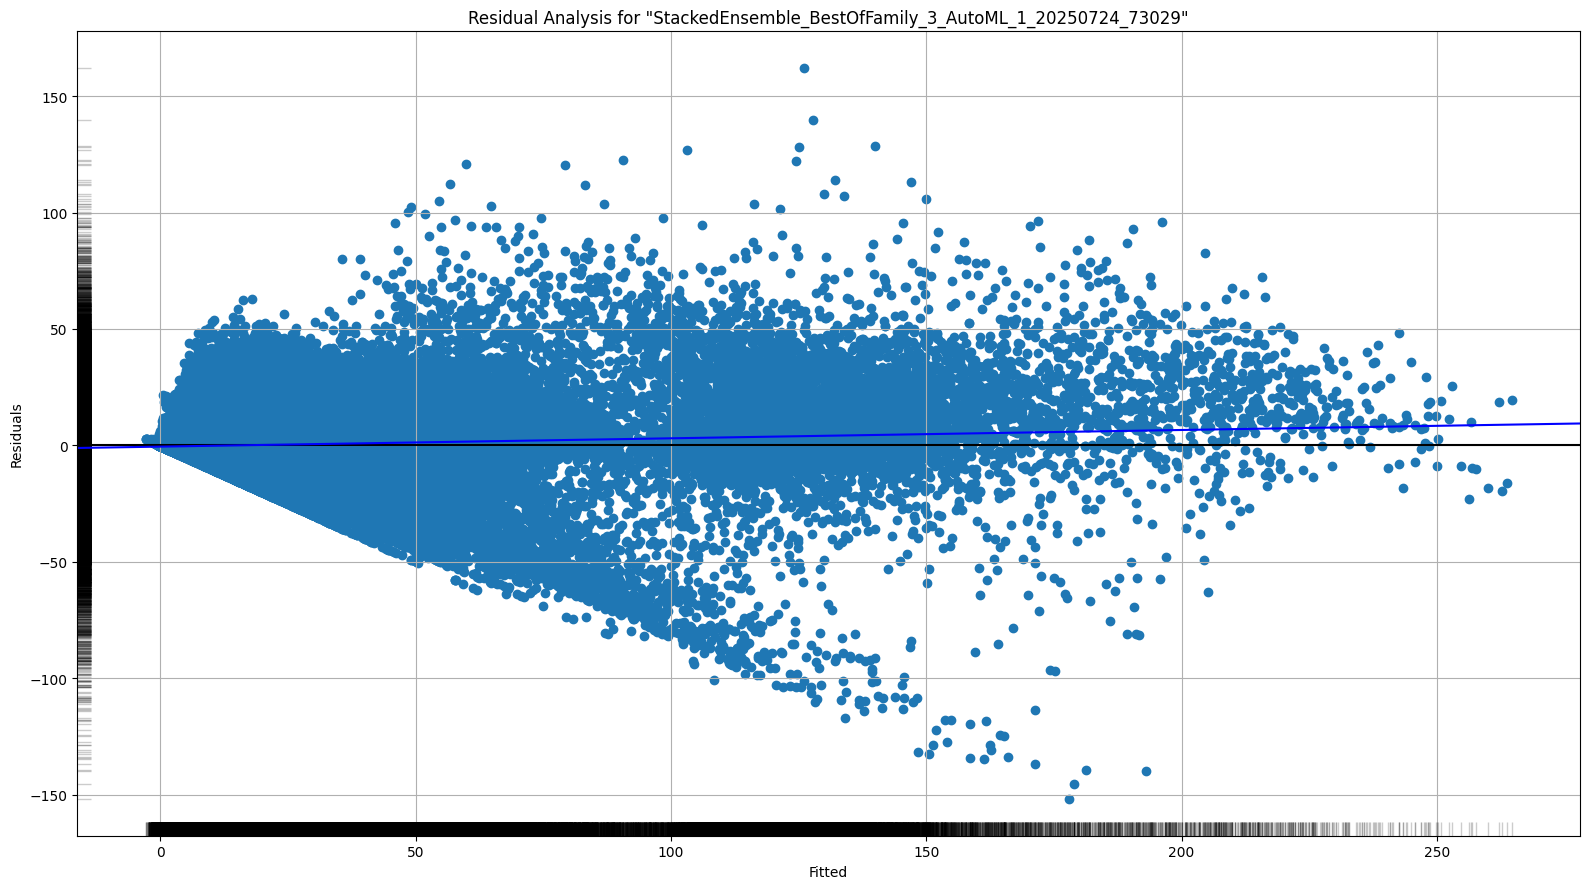

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

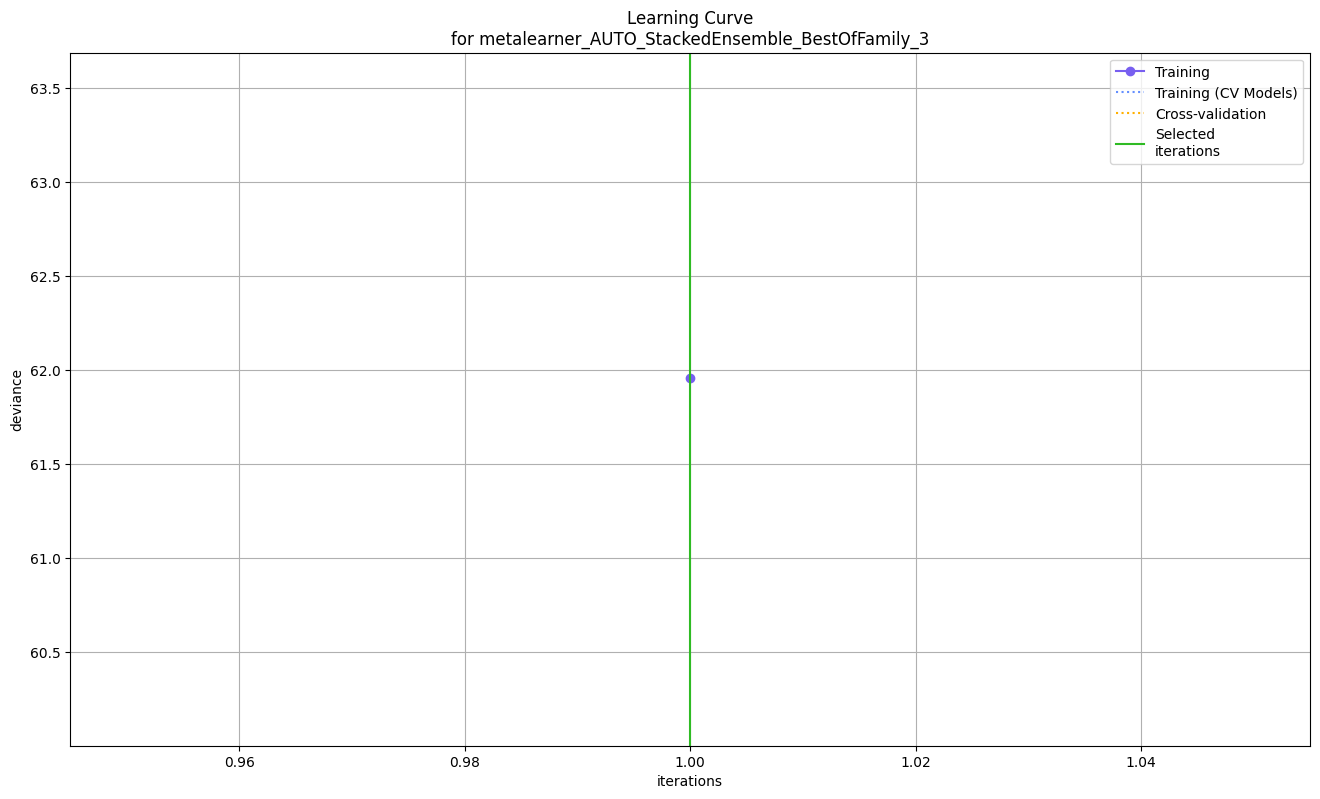

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

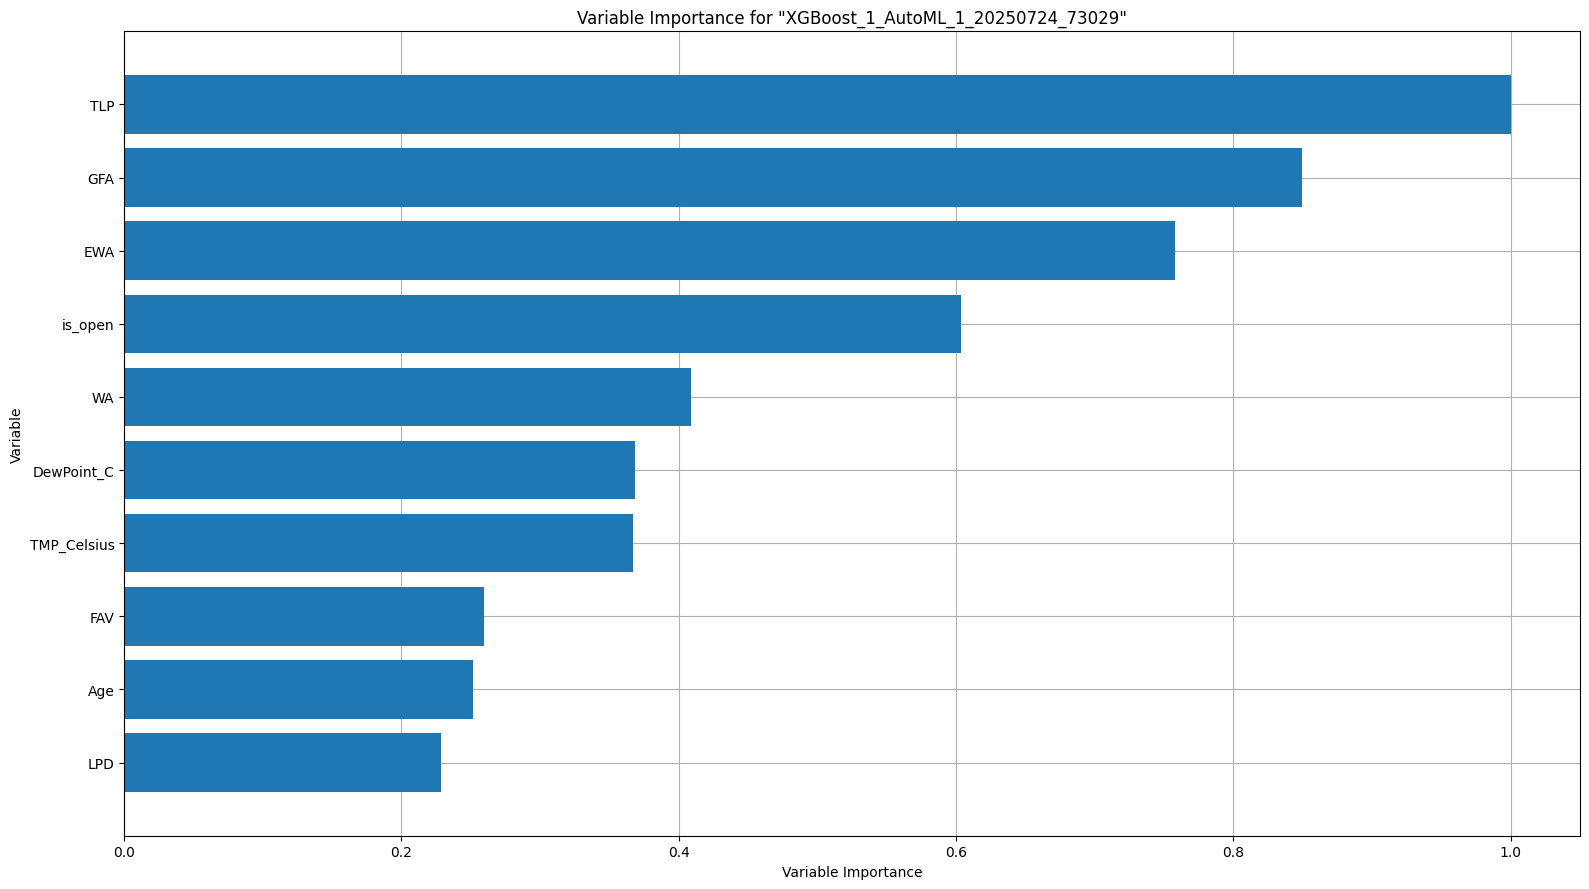

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

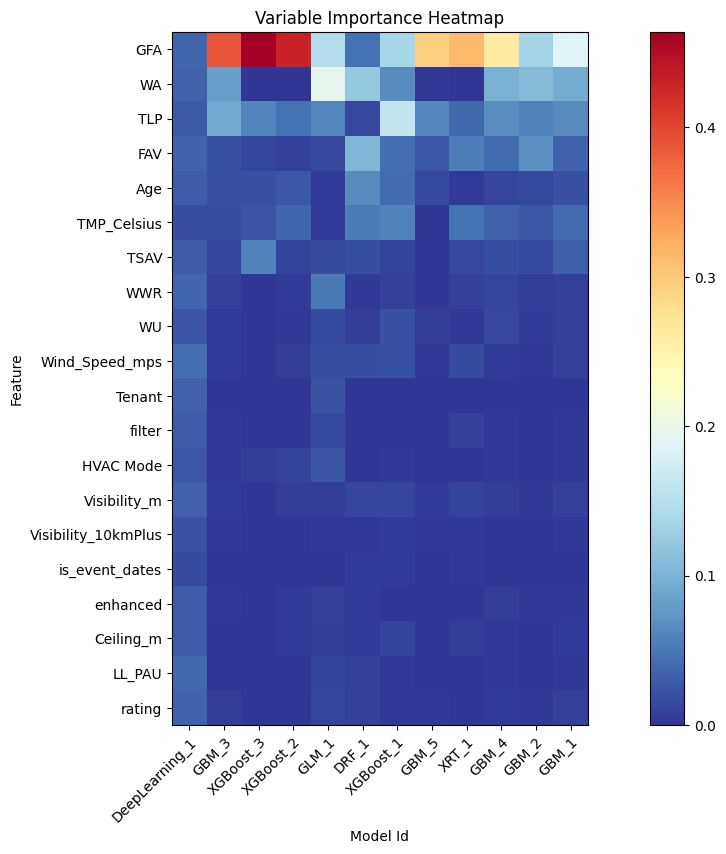

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

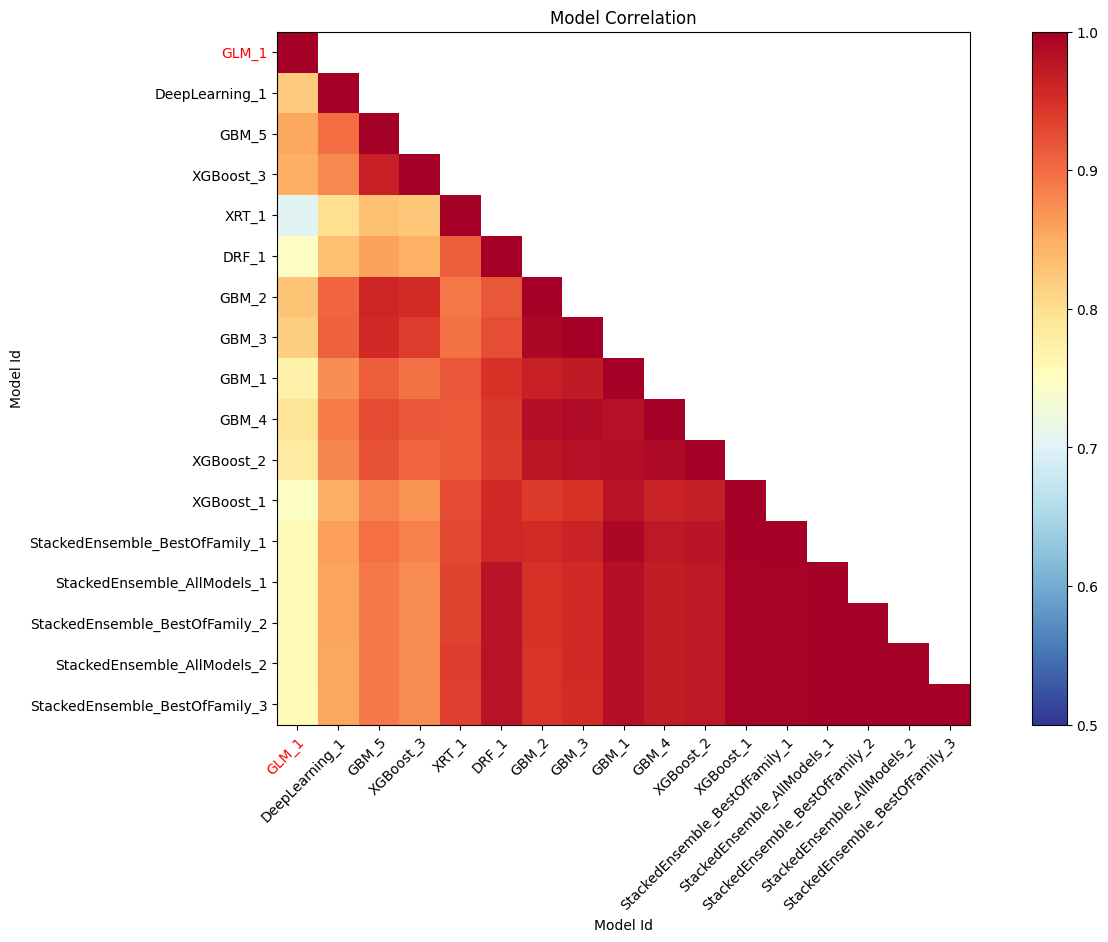

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

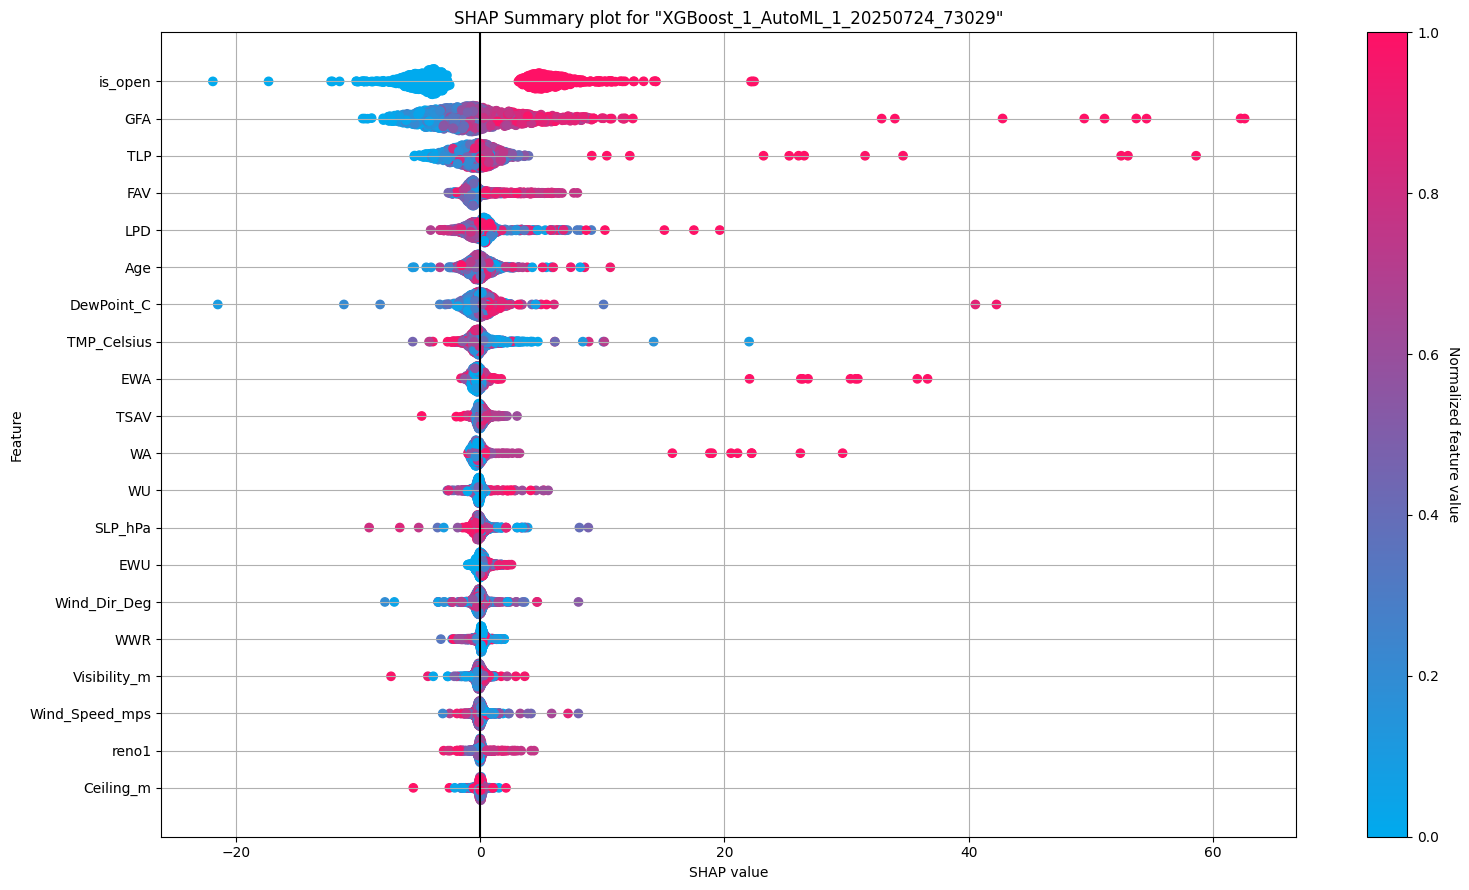

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

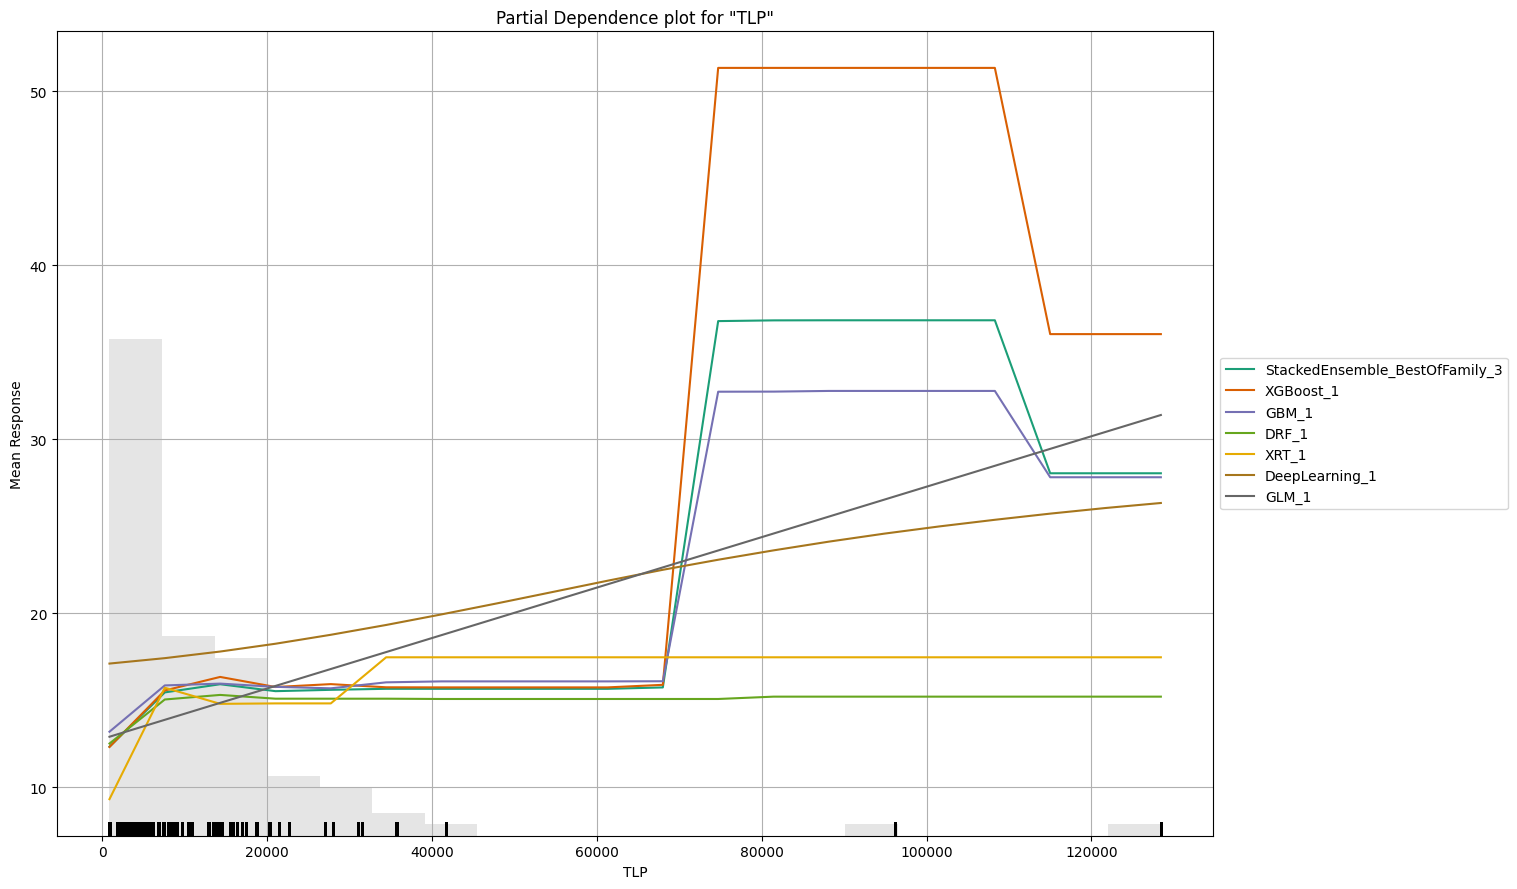

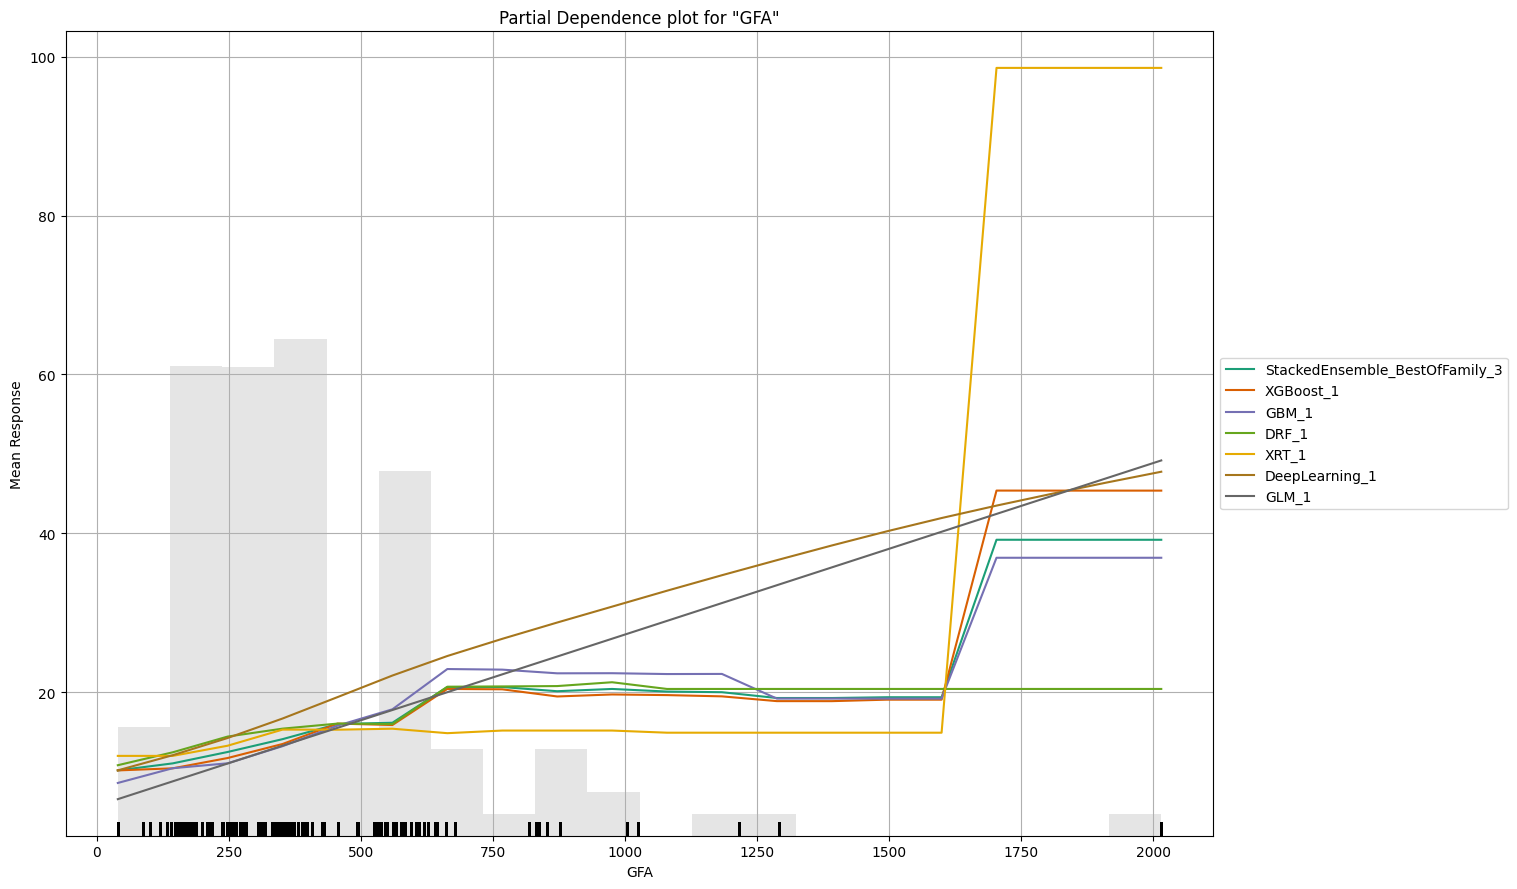

In [ ]:
explain_df = h2o_df.drop('Site')

aml.explain(frame=explain_df)